# Semana 21 

Presenta Juliho David Castillo Colmenares       

- Considere los valores históricos del Producto Interno Bruto (GDP) para México de acuerdo a los registros del banco mundial.

In [103]:
import pandas as pd 

data = pd.read_csv('./data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_238055.csv', skiprows=4)

data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN,NaN


In [104]:
data_mx = data[data['Country Name'] == 'Mexico']
data_mx.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
154,Mexico,MEX,GDP (current US$),NY.GDP.MKTP.CD,1.304000e+10,1.416000e+10,1.520000e+10,1.696000e+10,2.008000e+10,2.184000e+10,...,1.213294e+12,1.112233e+12,1.190721e+12,1.256300e+12,1.305212e+12,1.120741e+12,1.312558e+12,1.465854e+12,NaN,NaN


In [105]:
ts = data_mx.iloc[:, 4:-2].T
ts.columns = ['GDP']
ts.index = pd.to_datetime(ts.index)
ts.head()

,GDP
1960-01-01,1.304000e+10
1961-01-01,1.416000e+10
1962-01-01,1.520000e+10
1963-01-01,1.696000e+10
1964-01-01,2.008000e+10


In [106]:
# Count nans in the time series
ts.isna().sum()


GDP    0
dtype: int64

In [107]:
ts = ts.asfreq('AS')
ts.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
      

In [108]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1960-01-01 to 2022-01-01
Freq: AS-JAN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


In [109]:
ts.describe()

,GDP
count,6.300000e+01
mean,5.192872e+11
std,4.844297e+11
min,1.304000e+10
25%,8.495601e+10
50%,3.131397e+11
75%,9.818512e+11
max,1.465854e+12


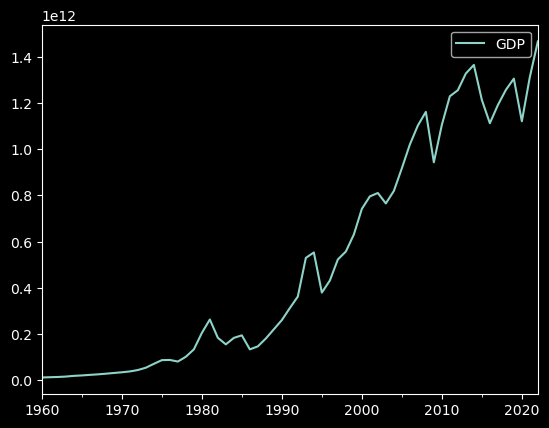

In [110]:
# Visualize the time series
import matplotlib.pyplot as plt
ts.plot()
plt.show()


- Mediante una regresión de mínimos cuadrados ajuste los datos del archivo anterior al modelo logístico siguiente: $$\hat{Y} = \dfrac{1}{1+e^{\beta_1(X-\beta_2)}}$$ donde X representa el período (año) y Y el PIB. De lo anterior es evidente que debe estimar dos parámetros (Beta1 y Beta2 ). ¿Tuvo algún problema en el proceso de estimación de parámetros? ¿A qué crees que se debe? 

El primer problema es que el modelo tiene una imagen $(0,1)$, lo cual no corresponde con el rango de valores de la serie de tiempo. 
Por lo cual tendríamos que añadir otro parámetro, digamos $A>0$, de manera que ajustemos el siguiente modelo: $$\hat{Y} = \dfrac{A}{1+e^{\beta_1(X-\beta_2)}}$$.

Ahora bien, podemos estimar este modelo utilizando el máximo sobre los valores de la serie de tiempo o normalizando estos valores.
Pero considerando que esto último se hará en los siguientes pasos, tomaré otra aproximación, ajustado la curva con `curve_fit` de la biblioteca `scipy`.

In [111]:
from scipy.optimize import curve_fit

def model(t, A, k, t0):
    return A /( 1 + np.exp(k*(t-t0)))

In [112]:
# Guess initial parameters
import numpy as np

A = np.max(ts['GDP'])
#loc year 2000 value
t0 = 2000
t1 = 2001
y1 = ts['GDP'].loc['2020'].values[0]
k = (1/(t1-t0)) * np.log((A-y1)/y1)
p0 = [A, k, t0]
p0

[1465854089286.47, -1.1778736429605428, 2000]

In [113]:
popt, _ = curve_fit(model, ts.index.year, ts['GDP'], p0=p0)
popt

array([ 1.41728426e+12, -1.29322289e-01,  2.00003681e+03])

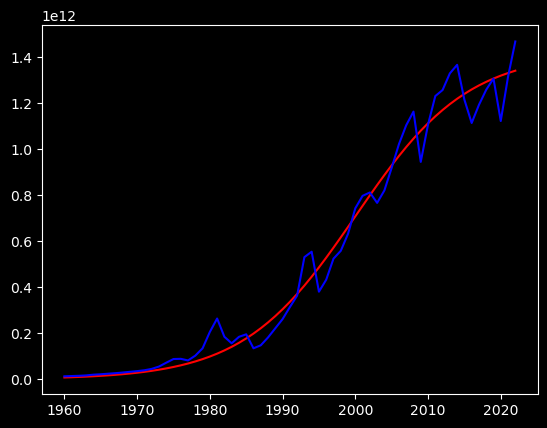

In [114]:
def adjusted_model(t):
    return model(t, *popt)

# ts['GDP'].plot()
plt.plot(ts.index.year, adjusted_model(ts.index.year), 'r')
plt.plot(ts.index.year, ts['GDP'], 'b')
plt.show()


In [115]:
# Score the model
from sklearn.metrics import r2_score, mean_squared_error

def report(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f'R2: {r2:.2f}')
    print(f'MSE: {mse:.2e}')

In [116]:
report(ts['GDP'], adjusted_model(ts.index.year))

R2: 0.98
MSE: 5.02e+21


In [133]:
# Forecast for 2022
t = 2022
forecast_1 = adjusted_model(t)
print(f"{t}: {forecast_1:.2e}") 

2022: 1.34e+12


- Transforme la base de datos previa dividiendo cada observación entre el valor máximo de la columna a la que pertenece. A este proceso se le denomina “Normalización”.

In [117]:
y = ts['GDP']
y_max = np.max(y)
y_max

1465854089286.47

In [118]:
t = ts.index.year.values
t

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

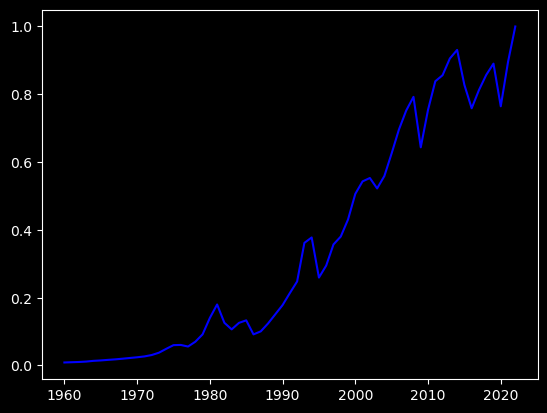

In [119]:
y_norm = y/y_max

plt.plot(t, y_norm, 'b')
plt.show()


- Vuelva a intentar el ajuste del problema anterior para las dos nuevas columnas resultantes. 
  - ¿Obtuvo resultados satisfactorios en esta ocasión?
  - Explique a detalle comentando sobre la bonda de ajuste. 
  - ¿Cuál sería su pronóstico del PIB (GDP) para México en el 2022? 
  - ¿Qué mecanismo de transformación tendría que realizar en dicho caso? 

Ahora, ajustaremos el modelo utilizando una trasformación para poder calcular los parámetros del modelo lineal subyacente. 

In [120]:
# Link function
def link_fn(y):
    return np.log((1-y)/y)


c:\Users\julih\anaconda3\envs\machine_learning\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


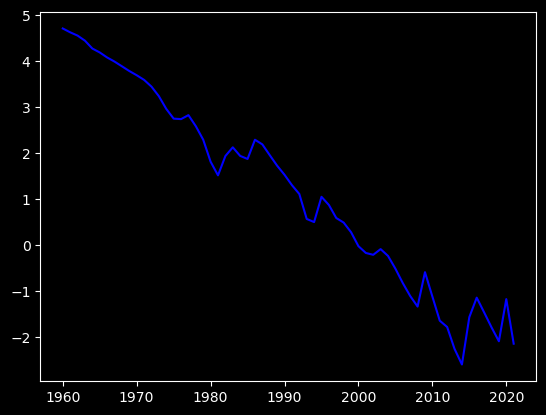

In [121]:
# Adjust the transformed data with a linear regression

z = link_fn(y_norm)
plt.plot(t, z, 'b')
plt.show()

In [122]:
# Count nans in z
np.isnan(z).sum()

0

In [123]:
# Check is there is some infinite value
np.isinf(z).sum()

1

In [124]:
z = z.replace([np.inf, -np.inf], np.nan)

In [125]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(t[~np.isnan(z)].reshape(-1, 1), z[~np.isnan(z)])

z_pred = lr.predict(t.reshape(-1, 1))
z_pred

array([ 4.73919519,  4.62317747,  4.50715975,  4.39114204,  4.27512432,
        4.1591066 ,  4.04308889,  3.92707117,  3.81105345,  3.69503574,
        3.57901802,  3.4630003 ,  3.34698259,  3.23096487,  3.11494715,
        2.99892944,  2.88291172,  2.766894  ,  2.65087629,  2.53485857,
        2.41884085,  2.30282314,  2.18680542,  2.0707877 ,  1.95476999,
        1.83875227,  1.72273455,  1.60671684,  1.49069912,  1.3746814 ,
        1.25866369,  1.14264597,  1.02662825,  0.91061054,  0.79459282,
        0.67857511,  0.56255739,  0.44653967,  0.33052196,  0.21450424,
        0.09848652, -0.01753119, -0.13354891, -0.24956663, -0.36558434,
       -0.48160206, -0.59761978, -0.71363749, -0.82965521, -0.94567293,
       -1.06169064, -1.17770836, -1.29372608, -1.40974379, -1.52576151,
       -1.64177923, -1.75779694, -1.87381466, -1.98983238, -2.10585009,
       -2.22186781, -2.33788553, -2.45390324])

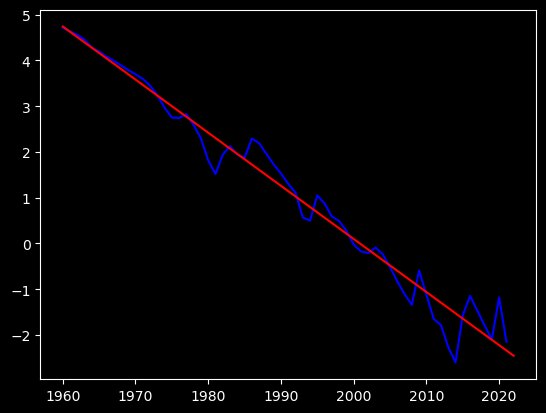

In [126]:
plt.plot(t, z, 'b')
plt.plot(t, z_pred, 'r')
plt.show()

Utilizaremos ahora esta regresión para crear el modelo logístico

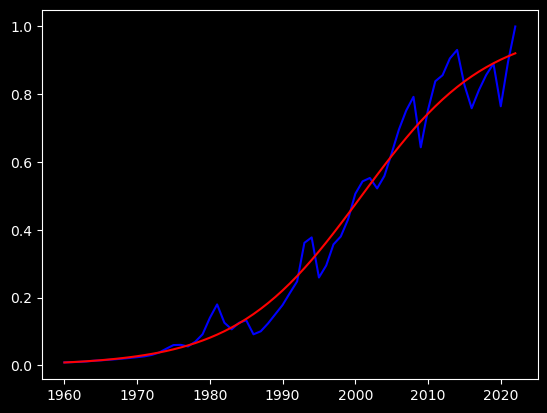

In [127]:
y_pred = 1/(1+np.exp(z_pred))

plt.plot(t, y_norm, 'b')
plt.plot(t, y_pred, 'r')
plt.show()

In [128]:
report(y_norm, y_pred)

R2: 0.98
MSE: 2.44e-03


In [129]:
report(A*y_norm, A*y_pred)

R2: 0.98
MSE: 5.25e+21


In [134]:
# Forecast for 2022
t = 2022
forecast_2 = A*y_pred[t-1960]
print(f"{t}: {forecast_2:.2e}")

2022: 1.35e+12


### Conclusiones

Ambos métodos arrojan resultados similares, aunque en el primero, confiamos más en la implementación de la librería `scipy`, para ajustar curvas en general, pero sin conocer los detalles. 

En cambio, el segundo método es más transparente, porque incluso cuando utilizamos `scikit-learn`, en realidad fue solo para automatizar el cálculo de las predicciones de una regresión similar simple, pero se puede realizar incluso con una rutina implementada por el usuario. 

Entre las ventajas del primer método, podemos señalar que no es necesario realizar transformación alguna de datos, y se pueden proveer valores iniciales aproximados, que se optimizarán con la rutina implementada por `scipy`.

Sin embargo, para otra clase de modeo, realizar estas optimizaciones puede resultar computacionalmente más costoso. 

El segundo método es más económico desde el punto de vista computacional, pero si el modelo no es lineal generalizado, la función de enlace podría no existir, y por lo tanto no sería aplicable. 

Finalmente, el pronóstico para 2022 es muy similar, pero sería interesante realizar una validación con más años, para saber que modelo realiza mejores predicciones, y no solo la bondad del ajuste de la interpolación. 
